In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neighbors
from scipy import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Leemos y preparamos el dataframe principal(df)
df = pd.read_csv('../Data/mineria/zonas.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df = df.set_index('EPISODE_ID')

#Clase sera el atributo referente a la clase de la tormenta en su zona
df['CLASE'] = 0

#Peligrosidad sera la media de los accidentes provocados por las tormentas de una clase de una zona
df['PELIGROSIDAD'] = 0

In [3]:
#Normalizador
min_max_scaler = MinMaxScaler()
#Reductor de dimensionalidad
pca_estimator = PCA(n_components=2)
#Distancia utilizada para medir la similitud entre tormentas
dist = sklearn.neighbors.DistanceMetric.get_metric('manhattan')

In [4]:
"""
TAREA: ir rellenando la lista cuts y la lista methods con los cortes que se vean mejores

NOTA: para no perderte en el bucle con las imagenes en el titulo pone la zona a la que se refiere el grafico
"""

'\nTAREA: ir rellenando la lista cuts y la lista methods con los cortes que se vean mejores\n\nNOTA: para no perderte en el bucle con las imagenes en el titulo pone la zona a la que se refiere el grafico\n'

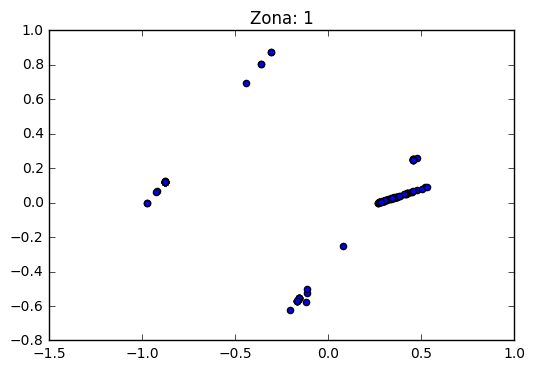

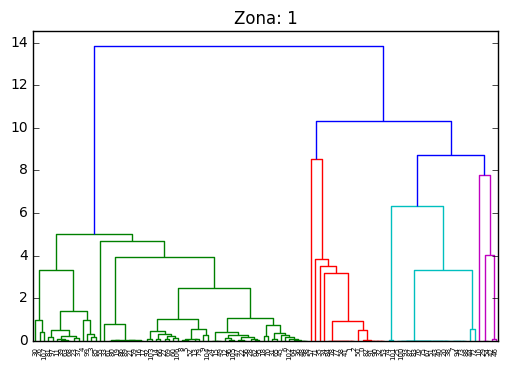

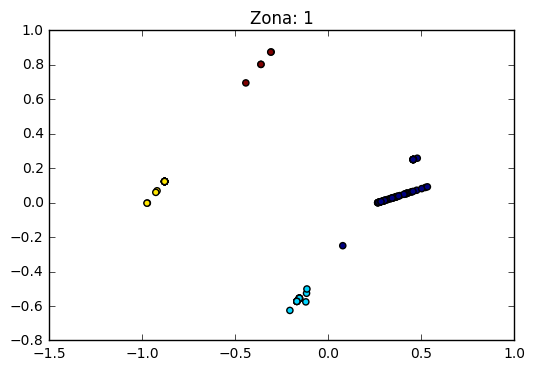

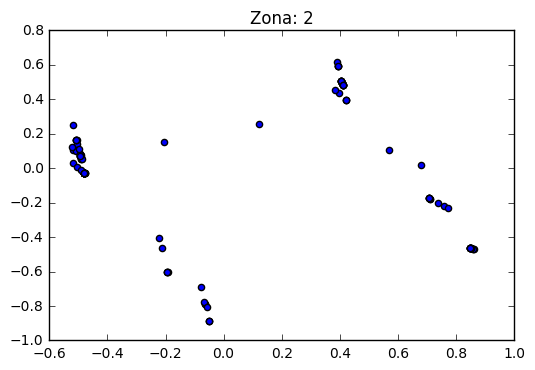

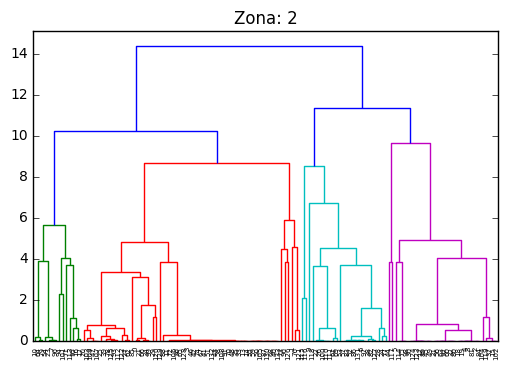

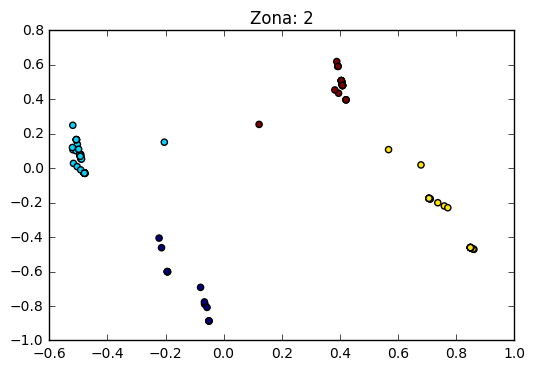

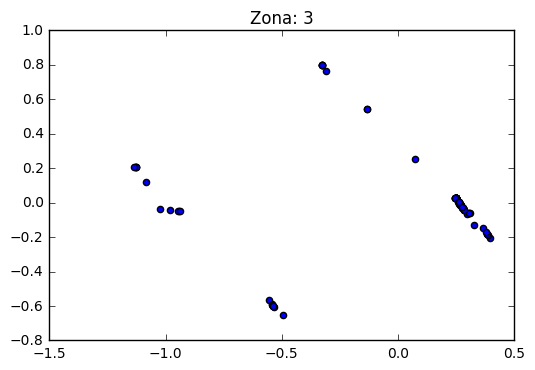

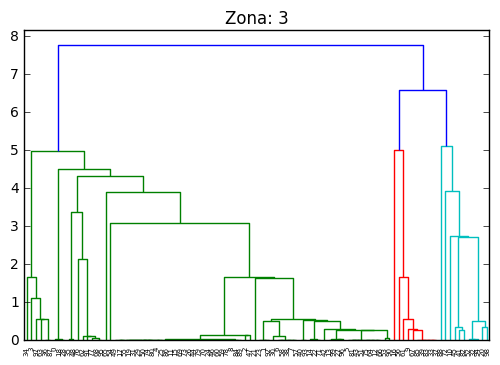

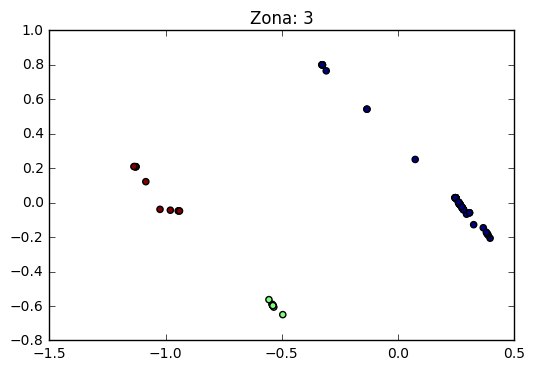

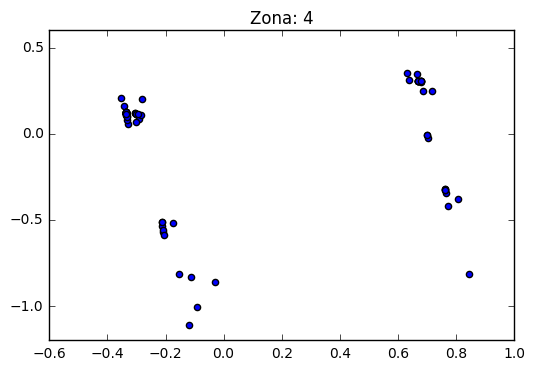

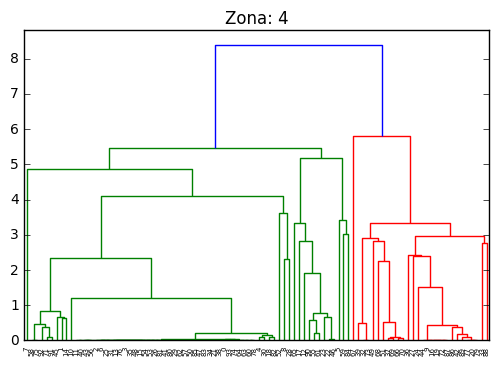

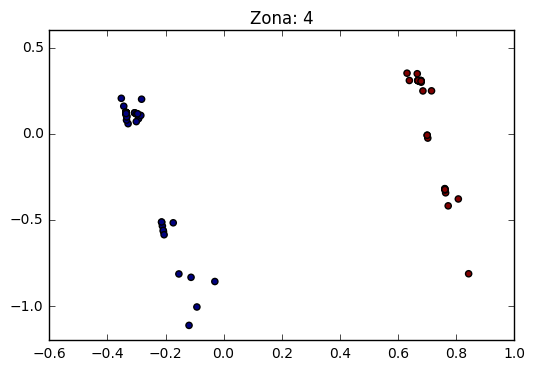

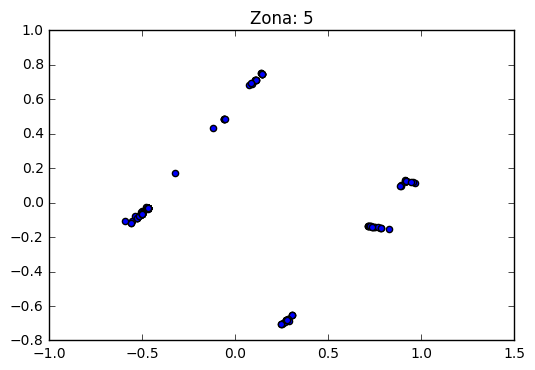

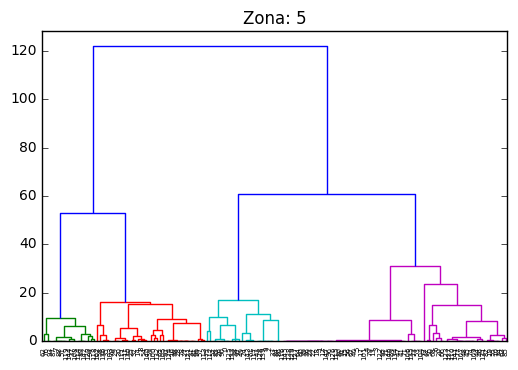

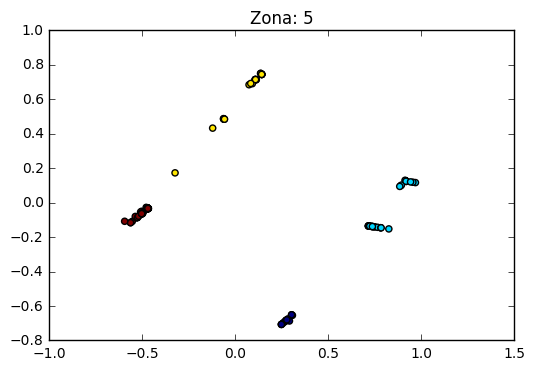

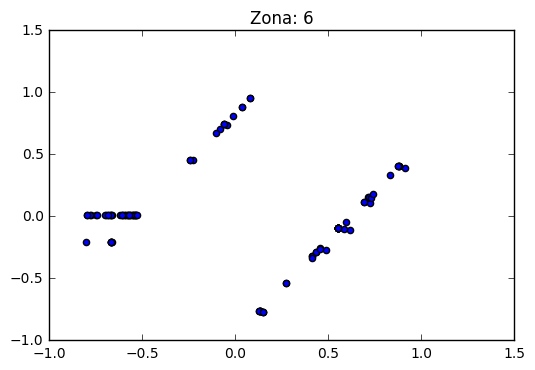

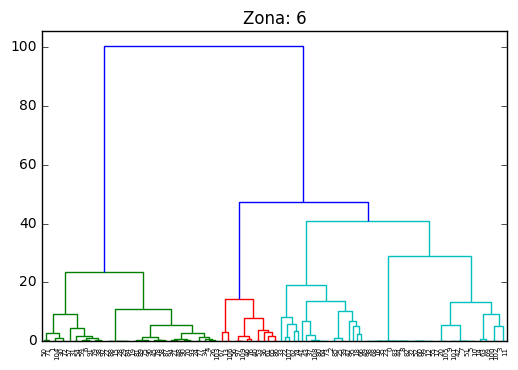

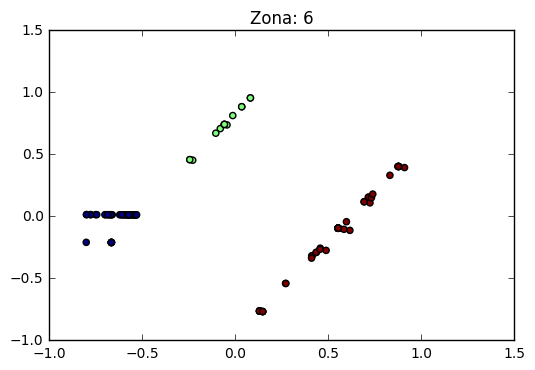

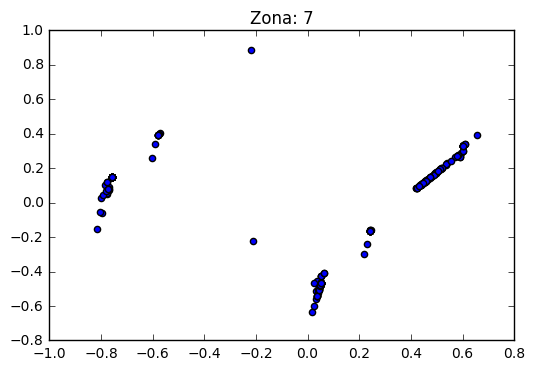

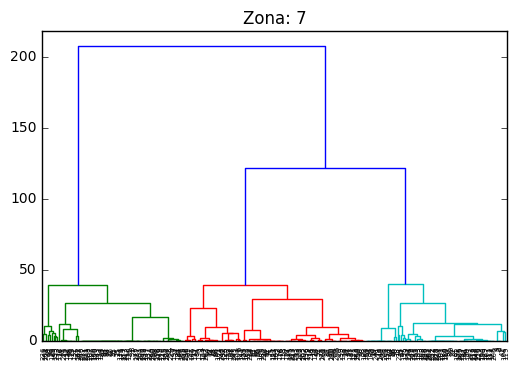

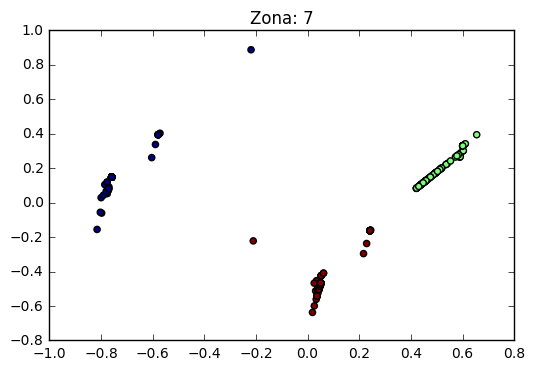

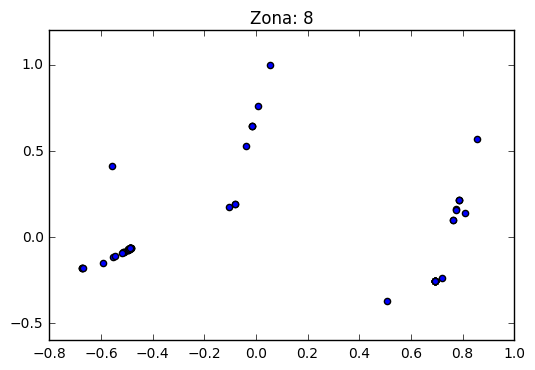

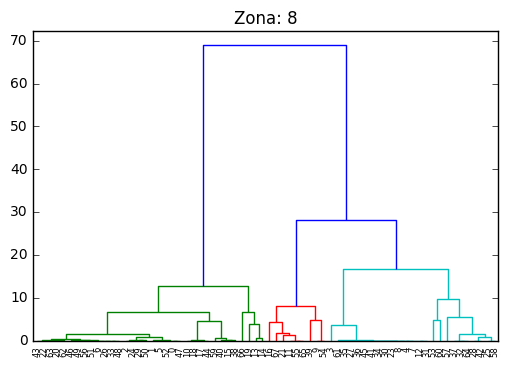

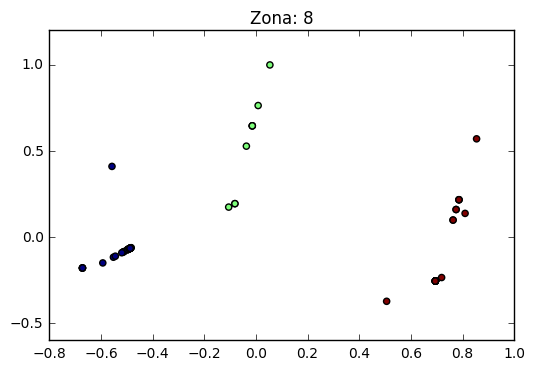

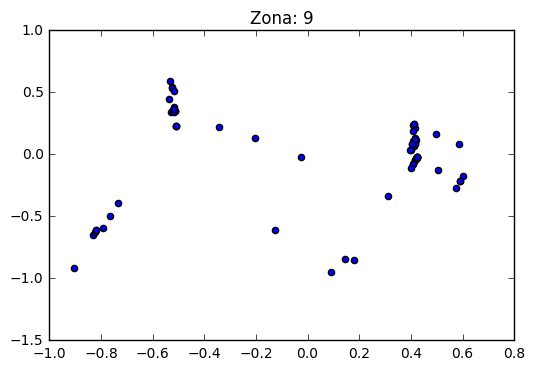

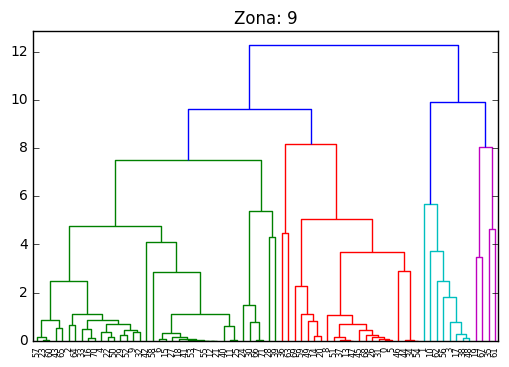

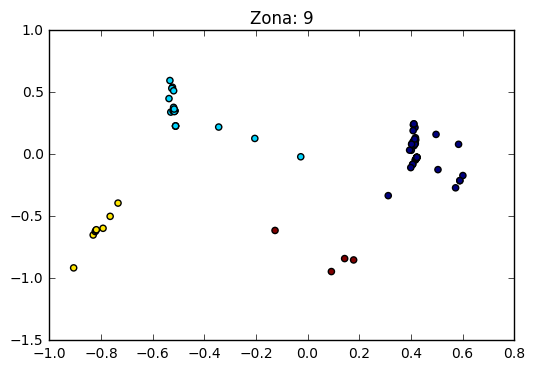

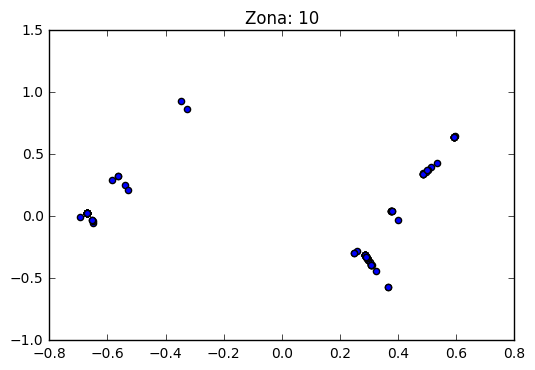

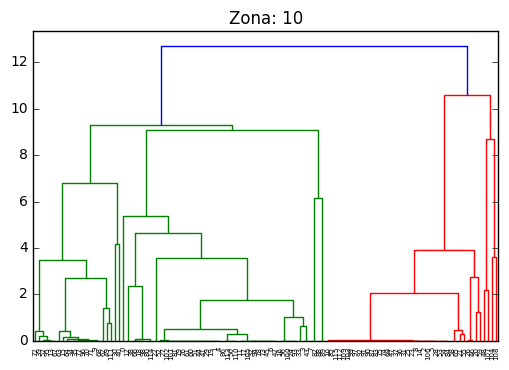

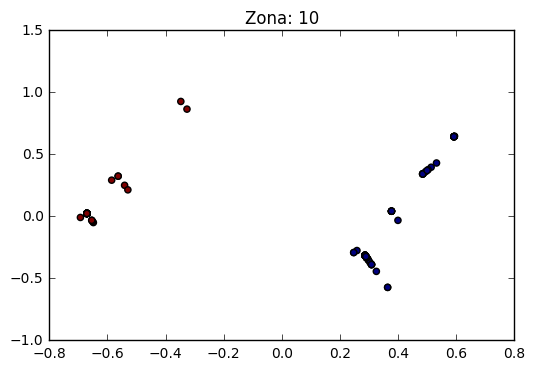

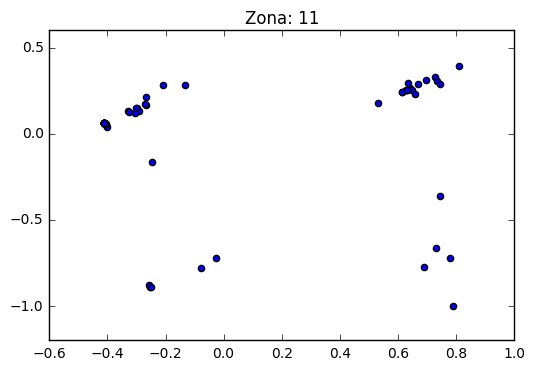

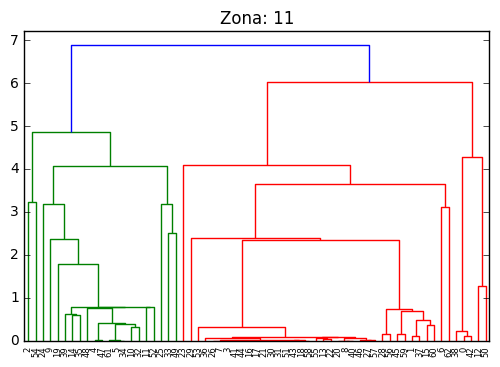

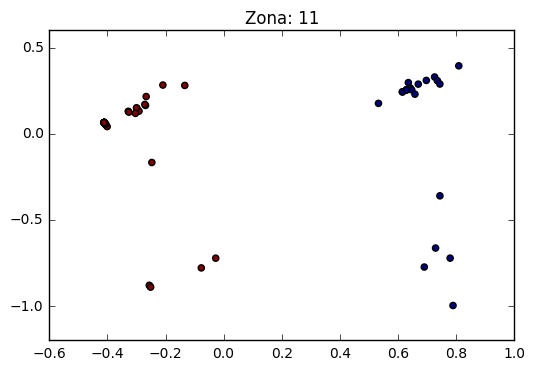

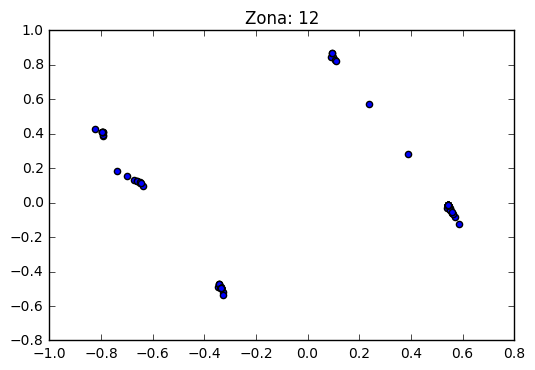

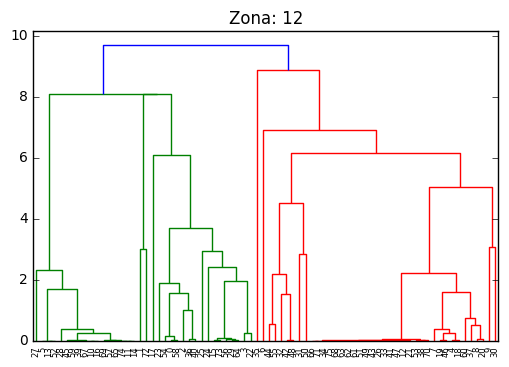

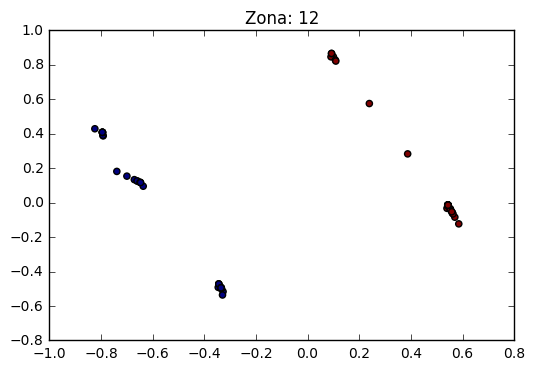

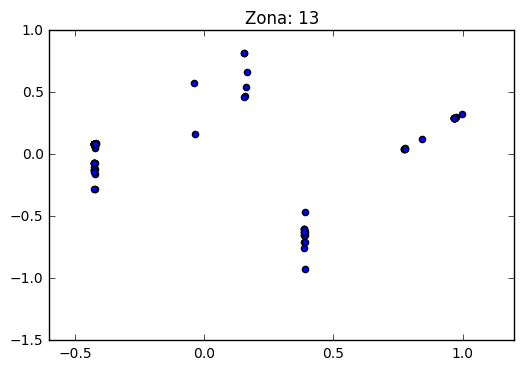

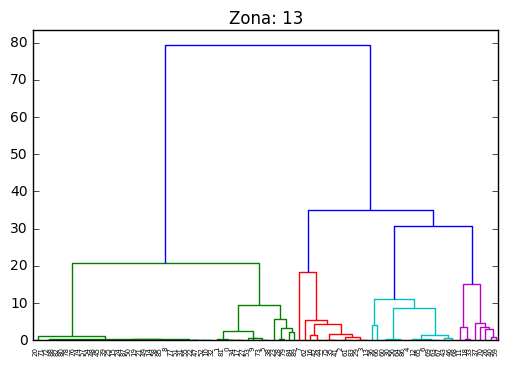

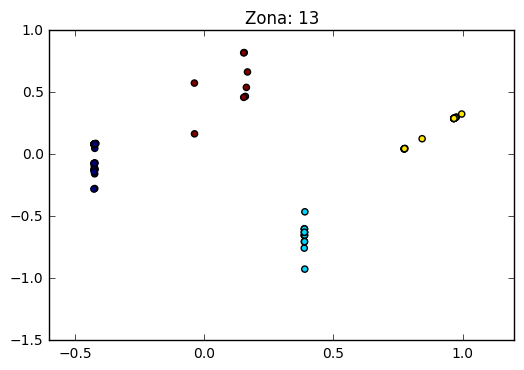

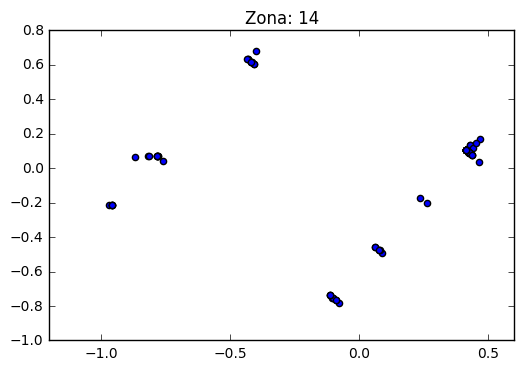

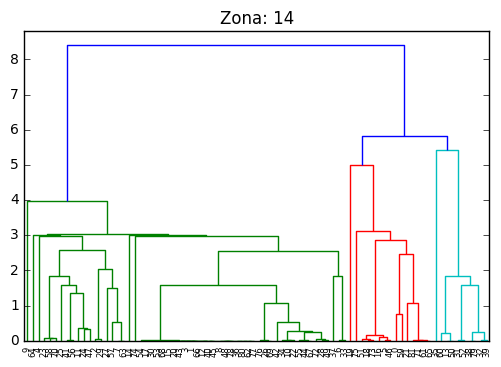

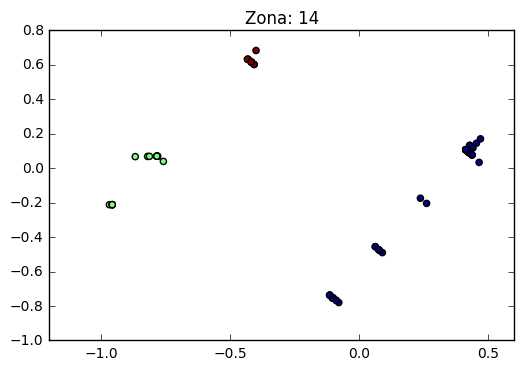

In [5]:
#OJO!!! La primera posicion no se utiliza porque no hay zona 1
# Advertencia: la posición 0 puede tener cluster pero la 15 no

cuts =    [0, 8.55, 10, 6, 7, 40, 42, 60, 20, 8.5, 11, 6.5, 9, 30, 5.6, 0]
methods = ['average', 'average', 'average', 'single', 'single', 'ward', 'ward', 'ward',
           'ward', 'weighted', 'average', 'single', 'median', 'ward', 'single', 'average']

for zona in range(1, 15):
    df_zona = df[df['ZONA'] == zona]
    df_tormentas = df_zona[['GRANIZO', 'LLUVIA', 'NIEVE', 'T. ELECTRICA', 'TORNADO', 'VIENTO', 'DURACION']]
    norm_tormentas = min_max_scaler.fit_transform(df_tormentas)

    #Reducimos la dimensionalidad para poder pintarlo
    X_tormentas = pca_estimator.fit_transform(norm_tormentas)
    plt.scatter(X_tormentas[:,0], X_tormentas[:,1])
    plt.title('Zona: ' + str(zona))
    plt.show()

    #Buscamos el mejor corte en base a su representacion grafica
    cut = cuts[zona]
    matsim = dist.pairwise(norm_tormentas)
    clusters = cluster.hierarchy.linkage(matsim, method=methods[zona])
    cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
    plt.title('Zona: ' + str(zona))
    plt.show()

    # Observamos el resultado del corte, si nos parece bueno lo dejamos, sino continuamos buscando otro mejor
    # No hacer mas de 5 o 6 clusters por zona
    labels = cluster.hierarchy.fcluster(clusters, cut, criterion='distance')
    plt.scatter(X_tormentas[:,0], X_tormentas[:,1], c=labels)
    plt.title('Zona: ' + str(zona))
    plt.show()

    #Añadimos la clase de cada tormenta al dataframe principal
    df.ix[df.ZONA == zona, 'CLASE'] = labels

    #Añadimos la peligrosidad de cada tormenta al dataframe principal
    for label in set(labels):
        condition = (df['ZONA'] == zona) & (df['CLASE'] == label)
        df.ix[condition, 'PELIGROSIDAD'] = df[condition]['ACCIDENTES'].mean()

In [6]:
# Guardamos el resultado
df.to_csv('../Data/mineria/resultado_jerarquico.csv')